## Priprava podatkov

Spodaj je graf, kako se je gorivo vozil spreminjalo skozi leta. Prevladujoči gorivi sta dizel in bencin.

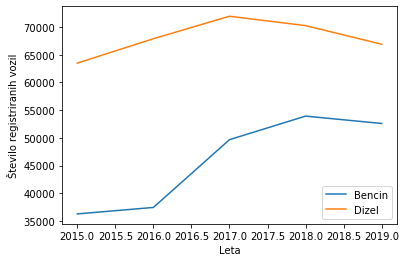

In [2]:
from csv import DictReader
import operator
import matplotlib.pyplot as plt

goriva = dict()

for i in range(1,13):
    for j in range(2015,2020):
        file = 'podatki/Podatki_{:02d}'.format(i) + str(j) + '.csv'
        podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')

        if j not in goriva:
            goriva[j] = dict()

        for row in podatki:
            gorivo = str(row['P.1.3-Vrsta goriva (opis)'])
            status = str(row['Status vozila (opis)'])
            if status == 'registrirano':
                if gorivo not in goriva[j]:
                    goriva[j][gorivo] = 0
                goriva[j][gorivo] += 1


leta = list(goriva.keys())
bencin = [j['Bencin'] for i,j in goriva.items()]
dizel = [j['Dizel'] for i,j in goriva.items()]


plt.plot(leta, bencin, label='Bencin')
plt.plot(leta, dizel, label='Dizel')
plt.xlabel('Leta')
plt.ylabel('Število registriranih vozil')
plt.legend()
plt.show()

Leto: 2015
Registriranih vozil, znamke VOLKSWAGEN je bilo: 14592
Registriranih vozil, znamke RENAULT je bilo: 12599
Registriranih vozil, znamke ŠKODA je bilo: 5918
Leto: 2016
Registriranih vozil, znamke VOLKSWAGEN je bilo: 16959
Registriranih vozil, znamke RENAULT je bilo: 11324
Registriranih vozil, znamke ŠKODA je bilo: 6733
Leto: 2017
Registriranih vozil, znamke VOLKSWAGEN je bilo: 18499
Registriranih vozil, znamke RENAULT je bilo: 12494
Registriranih vozil, znamke TOMOS je bilo: 8455
Leto: 2018
Registriranih vozil, znamke VOLKSWAGEN je bilo: 20031
Registriranih vozil, znamke RENAULT je bilo: 13112
Registriranih vozil, znamke ŠKODA je bilo: 8169
Leto: 2019
Registriranih vozil, znamke VOLKSWAGEN je bilo: 19202
Registriranih vozil, znamke RENAULT je bilo: 12086
Registriranih vozil, znamke ŠKODA je bilo: 8179


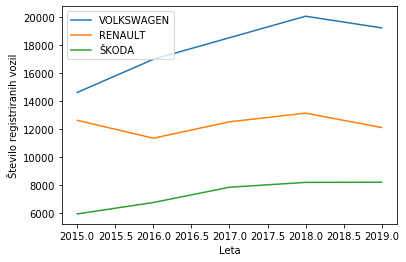

In [3]:
znamke = dict()

for i in range(1,13):
    for j in range(2015,2020):
        file = 'podatki/Podatki_{:02d}'.format(i) + str(j) + '.csv'
        podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')

        if j not in znamke:
            znamke[j] = dict()

        for row in podatki:
            znamka = str(row['D.1-Znamka'])
            status = str(row['Status vozila (opis)'])
            if status == 'registrirano':
                if znamka not in znamke[j]:
                    znamke[j][znamka] = 0
                znamke[j][znamka] += 1


for i, j in znamke.items():
    print('Leto:',i)
    for k, l in list(sorted(j.items(), key=lambda item: item[1], reverse=True))[:3]:
        print('Registriranih vozil, znamke',k,'je bilo:',l)

leta = list(znamke.keys())
volskwagen = [j['VOLKSWAGEN'] for i, j in znamke.items()]
renault = [j['RENAULT'] for i, j in znamke.items()]
skoda = [j['ŠKODA'] for i, j in znamke.items()]

plt.plot(leta, volskwagen, label='VOLKSWAGEN')
plt.plot(leta, renault, label='RENAULT')
plt.plot(leta, skoda, label='ŠKODA')
plt.xlabel('Leta')
plt.ylabel('Število registriranih vozil')
plt.legend()
plt.show()

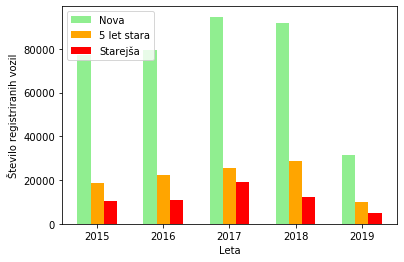

In [4]:
starost_vozil = dict()

for i in range(1,13):
    for j in range(2015,2020):
        file = 'podatki/Podatki_{:02d}'.format(i) + str(j) + '.csv'
        podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')

        if j not in starost_vozil:
            starost_vozil[j] = {'novo': 0, 'mlajse' : 0, 'starejse': 0}

        for row in podatki:
            if '5A-Leto izdelave' in row and str(row['Status vozila (opis)']) == 'registrirano' and row['5A-Leto izdelave'] is not None:
                try:
                    leto_izdelave = int(row['5A-Leto izdelave'])
                    if j == leto_izdelave:
                        starost_vozil[j]['novo'] += 1
                    elif (j - leto_izdelave) <= 5:
                        starost_vozil[j]['mlajse'] += 1
                    else:
                        starost_vozil[j]['starejse'] += 1
                except:
                    #Napaka v podatkih
                    None

leta = list(starost_vozil.keys())
nova = [j['novo'] for i, j in starost_vozil.items()]
mlajsa = [j['mlajse'] for i, j in starost_vozil.items()]
starejsa = [j['starejse'] for i, j in starost_vozil.items()]

plt.bar([i-0.2 for i in leta], nova, width=0.2, color='lightgreen', align='center', label='Nova')
plt.bar(leta, mlajsa, width=0.2, color='orange', align='center', label='5 let stara')
plt.bar([i+0.2 for i in leta], starejsa, width=0.2, color='r', align='center', label='Starejša')
plt.xlabel('Leta')
plt.ylabel('Število registriranih vozil')
plt.legend(loc=2)
plt.show()